In [20]:
import numpy as np   
import matplotlib.pyplot as plt
from numpy import *
def sigmoid(x):
    return 1.0 / ( 1.0 + np.exp( - x))
def d_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))
def softmax(x):
  e = np.exp(x)
  return e/e.sum()
#https://blog.csdn.net/weixin_42156589/article/details/80518437

In [23]:
a=np.random.rand(3,2)#the range is [0,1), include 0, do not include 1
print (a)

[[0.22764501 0.91665228]
 [0.67670406 0.57879096]
 [0.39986337 0.45942572]]


dataset1 shape
(60, 2)
dataset2 shape
(60, 2)


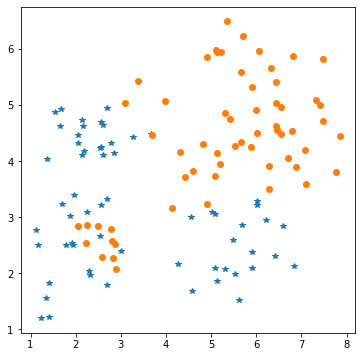

In [111]:
#create two datasets
#hstack, herizonal stack, All arrays must have the same shape along all but the second axis.
#reshape, a=nparray([2.3,4.5,5.6,1.2]), d=a.reshape(2,2)=([[2,3,4.5],[5.6,1.2]])
#np.random.rand(20, 2), 20*2 array from 0 to 1[0,1)
pts_positive = np.random.rand(10, 2) *2 + np.array([1.0, 3.0]).reshape(1,2)
pts_positive = np.vstack((pts_positive, np.random.rand(10, 2) + np.array([2.0, 4.0]).reshape(1,2)))
pts_positive = np.vstack((pts_positive, np.random.rand(10, 2) *2.0 + np.array([4.0, 1.0]).reshape(1,2)))
pts_positive = np.vstack((pts_positive, np.random.rand(10, 2) *2.0 + np.array([5.0, 2.0]).reshape(1,2)))
pts_positive = np.vstack((pts_positive, np.random.rand(10, 2) *2.0 + np.array([1.0, 1.0]).reshape(1,2)))
pts_positive = np.vstack((pts_positive, np.random.rand(10, 2) *3.0 + np.array([1.0, 2.0]).reshape(1,2)))
print("dataset1 shape")
print(pts_positive.shape)

pts_negative = np.random.rand(10, 2) + np.array([2.0, 2.0]).reshape(1,2)
pts_negative = np.vstack((pts_negative, np.random.rand(10, 2)*3 + np.array([3.0, 3.0]).reshape(1,2)))
pts_negative = np.vstack((pts_negative, np.random.rand(10, 2)*3 + np.array([4.0, 3.5]).reshape(1,2)))
pts_negative = np.vstack((pts_negative, np.random.rand(10, 2)*3 + np.array([5.0, 3.5]).reshape(1,2)))
pts_negative = np.vstack((pts_negative, np.random.rand(10, 2)*3 + np.array([5.0, 3.5]).reshape(1,2)))
pts_negative = np.vstack((pts_negative, np.random.rand(10, 2)*3 + np.array([5.0, 3.5]).reshape(1,2)))
print("dataset2 shape")
print(pts_negative.shape)

pts_positive = (pts_positive)
pts_negative = (pts_negative)

plt.figure(figsize = (6,6))
plt.plot(pts_positive[:,0],pts_positive[:,1],'*')
plt.plot(pts_negative[:,0],pts_negative[:,1],'o')

In [148]:
# let's train a newral network for the data

input_dim = 2
layer2_in = 2 # input dimension of layer2
layer2_out = 10 # output dimension of layer2
layer3_in = 10
layer3_out = 6
layerL_in = 6
layerL_out = 1  # between 0 and 1

# randomly initialize the weight matrix 
W2 = (np.random.rand(layer2_out, layer2_in)-0.5)*0.2
b2 = (np.random.rand(layer2_out,1)-0.5)*0.2

W3 = (np.random.rand(layer3_out,layer3_in)-0.5)*0.2
b3 = (np.random.rand(layer3_out,1)-0.5)*0.2

WL = (np.random.rand(layerL_out, layerL_in)-0.5)*0.2
bL = (np.random.rand(layerL_out,1)-0.5)*0.2

# What if we initialize them with zeros
#W2 = np.zeros((layer2_out, layer2_in))
#b2 = np.zeros((layer2_out,1))

#W3 = np.zeros((layer3_out,layer3_in))
#b3 = np.zeros((layer3_out,1))

#WL = np.zeros((layerL_out, layerL_in))
#bL = np.zeros((layerL_out,1))



# training data
# n_data = 4; # number of training samples
n_data = pts_positive.shape[0] + pts_negative.shape[0]

#x = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]]).T
x = np.vstack((pts_positive, pts_negative)).T

#y = np.array([[0.0], [1.0], [1.0], [0.0]]).T
y = np.vstack((np.ones((pts_positive.shape[0], 1)), np.zeros((pts_negative.shape[0], 1)))).T

# training 

lr = 0.5 # learning rate 
n_steps = 200000
for i in range(n_steps):
    
    # forward 
    z2 = np.matmul(W2, x) + b2
    a2 = sigmoid(z2)

    z3 = np.matmul(W3, a2) + b3
    a3 = sigmoid(z3)

    zL = np.matmul(WL, a3) + bL
    aL = sigmoid(zL)

    # print cost  
    if i % np.floor(n_steps/20) == 0:
        print('Cost:' + str(0.5*np.matmul((aL - y),(aL - y).T)/n_data))
    
    # backward 
    dL = (aL - y)*d_sigmoid(zL)
    
    d3 = np.multiply(np.matmul(WL.T, dL), d_sigmoid(z3))
    d2 = np.multiply(np.matmul(W3.T, d3), d_sigmoid(z2))

    dCdWL = np.matmul(dL, a3.T)/n_data
    dCdbL = np.sum(dL, axis=1).reshape((-1,1))/n_data 

    dCdW3 = np.matmul(d3, a2.T)/n_data
    dCdb3 = np.sum(d3, axis=1).reshape((-1,1))/n_data
    
    dCdW2 = np.matmul(d2, x.T)/n_data
    dCdb2 = np.sum(d2, axis=1).reshape((-1,1))/n_data

    WL = WL - lr*dCdWL
    bL = bL - lr*dCdbL
    
    W3 = W3 - lr*dCdW3
    b3 = b3 - lr*dCdb3
    
    W2 = W2 - lr*dCdW2    
    b2 = b2 - lr*dCdb2

# testing the trained network
z2 = np.matmul(W2, x) + b2
a2 = sigmoid(z2)

z3 = np.matmul(W3, a2) + b3
a3 = sigmoid(z3)

zL = np.matmul(WL, a3) + bL
aL = sigmoid(zL)

print('Cost:' + str(0.5*np.matmul((aL - y),(aL - y).T)/n_data))
print('\ninput:')
print(x)
print('\ntrue output:')
print(y)
print('\nprediction:')
print(aL)

print('\nweights:')
print(WL)
print(bL)
print(W3)
print(b3)
print(W2)
print(b2)

Cost:[[0.12505709]]
Cost:[[0.03721725]]
Cost:[[0.02543406]]
Cost:[[0.0225318]]
Cost:[[0.02087793]]
Cost:[[0.01962004]]
Cost:[[0.01862465]]
Cost:[[0.01794343]]
Cost:[[0.01383906]]
Cost:[[0.01275082]]
Cost:[[0.01204237]]
Cost:[[0.01150658]]
Cost:[[0.01105021]]
Cost:[[0.01060742]]
Cost:[[0.01014718]]
Cost:[[0.00962826]]
Cost:[[0.00896686]]
Cost:[[0.00825176]]
Cost:[[0.0076607]]
Cost:[[0.00723137]]
Cost:[[0.00690931]]

input:
[[2.79058909 1.69582059 2.55799084 1.65614846 1.54223238 2.56822025
  2.06057809 2.25479049 1.68585127 1.87721529 2.85947457 2.55185875
  2.60698135 2.60008374 2.1616401  2.04262462 2.13462605 2.13796907
  2.53221733 2.69870042 5.9150954  4.57670123 5.62257667 5.68074739
  5.12775475 4.56448879 5.09117002 4.26647996 5.89439875 5.52391171
  5.09338168 5.01820296 6.40294302 6.82459338 6.21430053 5.48977683
  6.01516271 5.30150281 6.58128965 6.02035612 2.31781875 1.22222764
  1.11687218 2.54399612 1.79367727 1.41773598 1.3341627  1.41615163
  2.69330846 2.30305564 3.2786

(2, 10000)


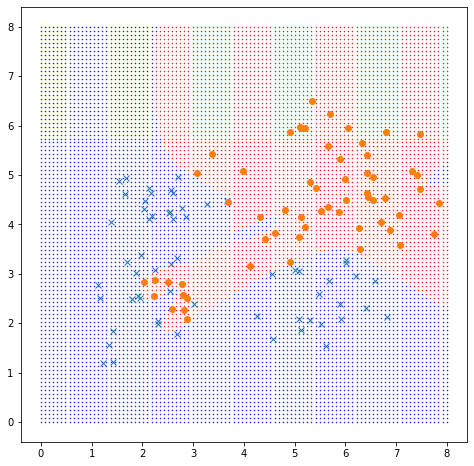

In [149]:
#visualize 
xs = np.linspace(0, 8, 100)
ys = np.linspace(0, 8, 100)
xv, yv = np.meshgrid(xs, ys)

pts_new = np.hstack((xv.reshape((-1,1)), yv.reshape((-1,1)))).T
print(pts_new.shape)

z2 = np.matmul(W2, pts_new) + b2
a2 = sigmoid(z2)

z3 = np.matmul(W3, a2) + b3
a3 = sigmoid(z3)

zL = np.matmul(WL, a3) + bL
aL = sigmoid(zL)

plt.figure(figsize=(8,8))
plt.plot(xv.reshape((-1,1))[aL[0,:]<0.5,0],yv.reshape((-1,1))[aL[0,:]<0.5,0],'r.' , markersize = 1)
plt.plot(xv.reshape((-1,1))[aL[0,:]>=0.5,0],yv.reshape((-1,1))[aL[0,:]>=0.5,0],'b.', markersize = 1)
plt.plot(pts_positive[:,0],pts_positive[:,1],'x')
plt.plot(pts_negative[:,0],pts_negative[:,1],'o')
plt.show()